# Stacked carton dataset for detection and segmentation  

In this Nodebook we download and explore Stacked Carton Dataset  
[Link to paper](https://arxiv.org/pdf/2102.12808)
[SCD: A Stacked Carton Dataset for Detection and Segmentation](https://arxiv.org/abs/2102.12808)

https://github.com/yancie-yjr/scd.github.io

# Setup

In [ ]:
!pip install opencv-python

from IPython.display import clear_output
clear_output()

In [ ]:
import os
import pandas as pd
import cv2
import numpy as np
import zipfile
import json
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

# Download Stacked Carton Dataset

https://github.com/yancie-yjr/scd.github.io
* total images: 16,136
* total instance masks: 250,000  

the ds is divided into 2 parts:
* Live Stacked Carton Dataset (collected from warehouse): 7735 images
* Online Staked Carbon Dataset (collected from internet): 8401 images

Labels:
* Carton (LSCD, OSCD)
* Carton-inner-all (LSCD)
* Carton-inner-occlusion (LSCD)
* Carton-outer-all (LSCD)
* Carton-outer-occlusion (LSCD)

In [ ]:
import gdown

Since we are going to download the dataset to our Gdrive, let's attach the Gdrive to the Notebook:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

let's change our current directory to the one we will use as our project folder:

In [ ]:
path = '/content/drive/MyDrive/0_Projects/drone-warehouse/'
os.chdir(path)

this is url of the Gdrive where SCD is stored

we are going to use the url above to download 2 zip files:
* OSCD.zip
* LSCD.zip  

which correspond to the 2 sub-datasets as described above:
* Online Staked Carbon Dataset
* Live Staked Carbon Dataset

## download zip archives
there are 3 zip archives to download:
* OSCD.zip
* LSCD.zip
* LSCD_occlusions.zip

In [ ]:
url='https://drive.google.com/file/d/1YeZ4mg_qZ4dBvKKfgGF8RQcyOMNoMp37/view?usp=sharing'
file_id = url.split('/d/')[1].split('/')[0]
print(file_id)
download_url = f'https://drive.google.com/uc?id={file_id}'
output = './images/OSCD.zip'

# Download the file
gdown.download(download_url, output, quiet=False)

In [ ]:
url='https://drive.google.com/file/d/1JRk_YjPpGcTCB-bvlJ37KsI5Sx1tfbUc/view?usp=sharing'
file_id = url.split('/d/')[1].split('/')[0]
print(file_id)
download_url = f'https://drive.google.com/uc?id={file_id}'
output = './images/LSCD.zip'

# Download the file
gdown.download(download_url, output, quiet=False)

In [ ]:
url='https://drive.google.com/file/d/1nJKS5YwsfxciRXg9ZooGcgdoXuKESMaj/view?usp=sharing'
file_id = url.split('/d/')[1].split('/')[0]
print(file_id)
download_url = f'https://drive.google.com/uc?id={file_id}'
output = './images/LSCD_occlusions.zip'

# Download the file
gdown.download(download_url, output, quiet=False)

1nJKS5YwsfxciRXg9ZooGcgdoXuKESMaj


Downloading...
From (original): https://drive.google.com/uc?id=1nJKS5YwsfxciRXg9ZooGcgdoXuKESMaj
From (redirected): https://drive.google.com/uc?id=1nJKS5YwsfxciRXg9ZooGcgdoXuKESMaj&confirm=t&uuid=7c0a8ed2-9962-4bd8-902b-7bca5aed99f6
To: /content/drive/MyDrive/0_Projects/drone-warehouse/images/LSCD_occlusions.zip
100%|██████████| 15.6G/15.6G [03:31<00:00, 73.7MB/s]


'./images/LSCD_occlusions.zip'

## what's inside the zip archives ?

### OSCD.zip

In [ ]:
zip_file_path = './images/OSCD.zip'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract the list of filenames
    oscd_filenames = zip_ref.namelist()
oscd_fn_df = pd.DataFrame(oscd_filenames,
                          columns = ['file_name'])
oscd_fn_df.shape

(25212, 1)

In [ ]:
oscd_fn_df.query("file_name.str.contains('json')")['file_name'].str.split('/').str[0].value_counts()

there are 2 types of json files:
* dataset annotations
* individual image - related

In [ ]:
oscd_fn_df.query("file_name.str.contains('coco_carton.*json')").file_name.tolist()

In [ ]:
labelme_df = oscd_fn_df.query("file_name.str.contains('labelme.*.jpg')")
print(labelme_df.shape)
labelme_df.head()

### individual image-related files

In [ ]:
file_name = labelme_df.sample(1)['file_name'].values[0]
print(file_name)
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    with zip_ref.open(file_name) as file:
        file_content = file.read()
        image = Image.open(BytesIO(file_content))
plt.imshow(image)

In [ ]:
suffix = file_name.split('/')[-1].split('.')[0]
print(suffix)
df = oscd_fn_df.query("file_name.str.contains(@suffix, regex=False)")
df

In [ ]:

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
  with zip_ref.open(file_name.replace('.jpg','.json')) as file:
    file_content = file.read()
    file_text = file_content.decode('utf-8')

json_data = json.loads(file_text)
list(json_data)

In [ ]:
json_data['imagePath'], json_data['imageData']

In [ ]:
json_data['shapes']

In [ ]:
file_name = df.iloc[0,0]
print(file_name)
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    with zip_ref.open(file_name) as file:
        file_content = file.read()
        image = Image.open(BytesIO(file_content))
plt.imshow(image)

In [ ]:
oscd_fn_df.query("file_name.str.contains('5693')")

In [ ]:
file_name = 'coco_carton/oneclass_carton/annotations/instances_train2017.json'
zip_file_path = './images/OSCD.zip'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    with zip_ref.open(file_name) as file:
        file_content = file.read()
        image = Image.open(BytesIO(file_content))

image

In [ ]:
oscd_images_df = pd.DataFrame(json_data['images'])
oscd_annot_df = pd.DataFrame(json_data['annotations'])
oscd_images_df.shape, oscd_annot_df.shape

In [ ]:
oscd_annot_df

### image_annotations

In [ ]:
oscd_fn_df.query("file_name.str.contains('coco_carton.*json')").file_name.tolist()

In [ ]:
fn = 'coco_carton/oneclass_carton/annotations/instances_train2017.json'
print(fn)
zip_file_path = './images/OSCD.zip'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
  with zip_ref.open(fn) as file:
    file_content = file.read()
    file_text = file_content.decode('utf-8')

json_data = json.loads(file_text)
print(list(json_data))
train_images = json_data['images']
train_annotations = json_data['annotations']
len(train_images), len(train_annotations)

In [ ]:
oscd_image_train_df = pd.DataFrame(train_images)
oscd_image_train_df.shape

In [ ]:
oscd_image_train_df

In [ ]:
oscd_annot_train_df = pd.DataFrame(train_annotations)
oscd_annot_train_df.shape

In [ ]:
oscd_annot_train_df

### view images and visualize carton annotations

In [ ]:
idx = 189
zip_file_path = './images/OSCD.zip'
image_suffix = oscd_image_train_df.loc[idx,'file_name']
print(image_suffix)
img_fn = f"coco_carton/oneclass_carton/images/train2017/{image_suffix}"
print(img_fn)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
  with zip_ref.open(img_fn) as file:
    file_content = file.read()
    image = Image.open(BytesIO(file_content))
plt.imshow(image);
numpy_image = np.array(image)
image = cv2.cvtColor(numpy_image, cv2.COLOR_RGB2BGR)

In [ ]:
annot_image_df = annot_train_df.query("image_id == @idx")
for row in annot_image_df.itertuples():
  x, y, w, h = row.bbox
  cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
plt.imshow(image);

## LSCD.zip

In [ ]:
zip_file_path = './images/LSCD.zip'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract the list of filenames
    lscd_filenames = zip_ref.namelist()

lscd_fn_df = pd.DataFrame(lscd_filenames,
                          columns = ['file_name'])
lscd_fn_df.shape

(7741, 1)

In [ ]:
lscd_fn_df

,file_name
0,annotations/
1,annotations/instances_train2017.json
2,annotations/instances_val2017.json
3,images/
4,images/train2017/
...,...
7736,images/val2017/y (76).jpg
7737,images/val2017/y (80).jpg
7738,images/val2017/y (91).jpg
7739,images/val2017/y (93).jpg


In [ ]:
lscd_fn_df.query("file_name.str.contains('json')").file_name.tolist()

['annotations/instances_train2017.json', 'annotations/instances_val2017.json']

In [ ]:
file_name = 'annotations/instances_train2017.json'
zip_file_path = './images/LSCD.zip'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    with zip_ref.open(file_name) as file:
        file_content = file.read()
        file_text = file_content.decode('utf-8')

json_data = json.loads(file_text)
print(list(json_data))
len(json_data['images']), len(json_data['annotations'])

['info', 'license', 'images', 'annotations', 'categories']


(6735, 70838)

### image_annotations

In [ ]:
lscd_image_train_df = pd.DataFrame(json_data['images'])
lscd_image_train_df.shape

(6735, 4)

In [ ]:
lscd_image_train_df

,height,width,id,file_name
0,3680,2728,0,2850.jpg
1,2976,3968,1,6 (144).jpg
2,3809,2736,2,IMG_20191125_145411.jpg
3,5792,4344,3,y (18).jpg
4,3264,2001,4,2021.jpg
...,...,...,...,...
6730,3314,2131,6730,2948.jpg
6731,385,319,6731,1771.jpg
6732,531,263,6732,1675.jpg
6733,3999,2741,6733,2 (38).jpg


In [ ]:
lscd_annot_train_df = pd.DataFrame(json_data['annotations'])
lscd_annot_train_df.shape

(70838, 7)

In [ ]:
lscd_annot_train_df

,id,image_id,category_id,segmentation,bbox,iscrowd,area
0,0,0,1,"[[90.82352941176464, 3184.3529411764703, 1467....","[90.82352941176464, 3125.529411764706, 1376.47...",0,663944.636678
1,1,0,1,"[[1467.2941176470586, 3125.529411764706, 2331....","[1467.2941176470586, 3096.1176470588234, 864.7...",0,391660.899654
2,2,0,1,"[[2331.9999999999995, 3096.1176470588234, 2727...","[2302.5882352941176, 3070.0, 424.4117647058824...",0,190835.501730
3,3,0,1,"[[967.2941176470586, 2684.3529411764703, 2320....","[961.411764705882, 2654.941176470588, 1370.588...",0,661107.266436
4,4,0,1,"[[20.235294117646845, 2696.1176470588234, 967....","[20.235294117646845, 2678.470588235294, 947.05...",0,467958.477509
...,...,...,...,...,...,...,...
70833,70833,6734,1,"[[1846.9655172413795, 1842.7586206896553, 2447...","[1805.586206896552, 1842.0, 641.4137931034479,...",0,453899.788347
70834,70834,6734,1,"[[1891.7931034482763, 935.8620689655173, 2447....","[1891.7931034482763, 1.0, 555.2068965517237, 9...",0,519041.868014
70835,70835,6734,1,"[[1871.1034482758623, 939.3103448275863, 1933....","[1129.7241379310349, 0.0, 803.2758620689651, 9...",0,771144.827586
70836,70836,6734,1,"[[1174.5517241379312, 963.4482758620691, 474.5...","[313.0, 0.0, 861.5517241379312, 980.6896551724...",0,844914.863258


### view LSCD images and visualize carton annotations

6 (144).jpg
images/train2017/6 (144).jpg


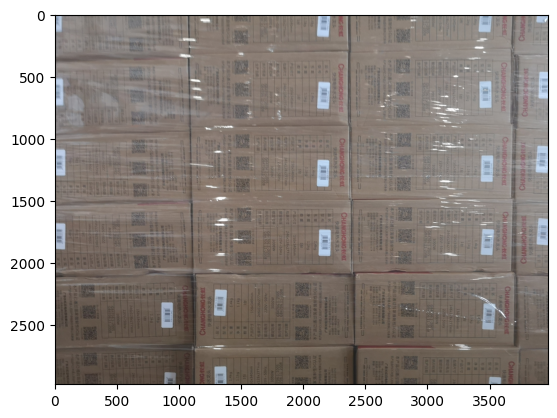

In [ ]:
idx = 1
image_suffix = lscd_image_train_df.loc[idx,'file_name']
print(image_suffix)

img_fn = f"images/train2017/{image_suffix}"
print(img_fn)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
  with zip_ref.open(img_fn) as file:
    file_content = file.read()
    image = Image.open(BytesIO(file_content))
plt.imshow(image);
numpy_image = np.array(image)
image = cv2.cvtColor(numpy_image, cv2.COLOR_RGB2BGR)

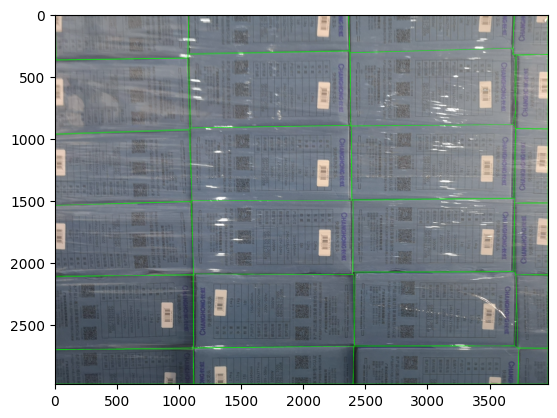

In [ ]:
annot_image_df = lscd_annot_train_df.query("image_id == @idx")
for row in annot_image_df.itertuples():
  points = row.segmentation
  pts = np.array(points, np.int32).reshape((-1, 2))
  pts = pts.reshape((-1, 1, 2))
  cv2.polylines(image, [pts], isClosed=True, color=(0, 255, 0), thickness=2)
  plt.imshow(image);

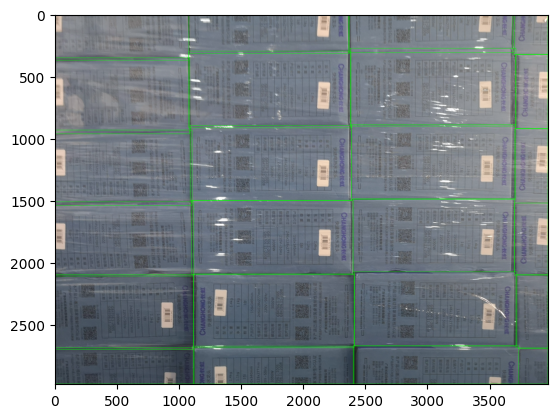

In [ ]:
annot_image_df = lscd_annot_train_df.query("image_id == @idx")
for row in annot_image_df.itertuples():
    x, y, w, h = row.bbox
    cv2.rectangle(image, (int(x), int(y)), (int(x + w), int(y + h)), (0, 255, 0), 2)
plt.imshow(image)


## LSCD_occlusions.zip

In [ ]:
zip_file_path = './images/LSCD_occlusions.zip'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    # Extract the list of filenames
    lscd_occlusions_filenames = zip_ref.namelist()
lscd_occl_fn_df = pd.DataFrame(lscd_filenames,
                          columns = ['file_name'])

lscd_occl_fn_df.shape

(7741, 1)

In [ ]:
lscd_occl_fn_df.query("file_name.str.contains('json')").file_name.tolist()

['annotations/instances_train2017.json', 'annotations/instances_val2017.json']

In [ ]:
file_name = 'annotations/instances_train2017.json'
zip_file_path = './images/LSCD_occlusions.zip'
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    with zip_ref.open(file_name) as file:
        file_content = file.read()
        file_text = file_content.decode('utf-8')

json_data = json.loads(file_text)
print(list(json_data))
len(json_data['images']), len(json_data['annotations'])

['info', 'license', 'images', 'annotations', 'categories']


(6735, 71480)

In [ ]:
lscd_occl_image_train_df = pd.DataFrame(json_data['images'])
lscd_occl_image_train_df.shape

(6735, 4)

In [ ]:
lscd_occl_annot_train_df = pd.DataFrame(json_data['annotations'])
lscd_occl_annot_train_df.shape

(71480, 7)

In [ ]:
lscd_occl_annot_train_df

,id,image_id,category_id,segmentation,bbox,iscrowd,area
0,0,0,4,"[[1242.0, 1582.0, 2114.0, 1614.0, 2118.0, 1346...","[1242.0, 1338.0, 1196.0, 1261.0]",0,1.508156e+06
1,1,0,4,"[[18.0, 1466.0, 1070.0, 1402.0, 1002.0, 10.0, ...","[0, 10.0, 1070.0, 1456.0]",0,1.557920e+06
2,2,0,4,"[[10.0, 1482.0, 1018.0, 1430.0, 1045.0, 2599.0...","[10.0, 1430.0, 1035.0, 1169.0]",0,1.209915e+06
3,3,0,3,"[[1134.0, 1118.0, 2090.0, 1126.0, 2114.0, 1618...","[1118.0, 1118.0, 996.0, 500.0]",0,4.980000e+05
4,4,0,3,"[[1118.0, 574.0, 1138.0, 486.0, 2094.0, 518.0,...","[1118.0, 486.0, 1004.0, 628.0]",0,6.305120e+05
...,...,...,...,...,...,...,...
71475,71475,6733,4,"[[2125.8571428571427, 93.71428571428571, 2129....","[2125.8571428571427, 90.14285714285714, 1507.1...",0,1.130357e+06
71476,71476,6733,3,"[[2115.142857142857, 61.57142857142857, 25.857...","[0.8571428571427759, 0, 2121.428571428571, 829...",0,1.759573e+06
71477,71477,6734,4,"[[299.0, 283.66666666666674, 3412.333333333333...","[259.0, 283.66666666666674, 3153.3333333333335...",0,7.729871e+06
71478,71478,6734,4,"[[589.0, 113.66666666666669, 2619.0, 83.666666...","[579.0, 83.66666666666669, 2040.0, 346.6666666...",0,7.072000e+05


g3 (6).jpg
images/train2017/g3 (6).jpg


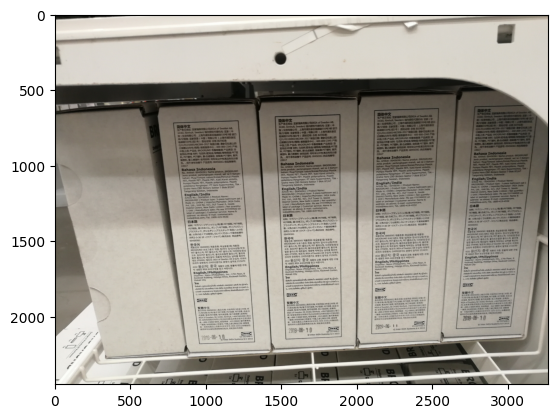

In [ ]:
idx = 1
image_suffix = lscd_occl_image_train_df.loc[idx,'file_name']
print(image_suffix)

img_fn = f"images/train2017/{image_suffix}"
print(img_fn)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
  with zip_ref.open(img_fn) as file:
    file_content = file.read()
    image = Image.open(BytesIO(file_content))
plt.imshow(image);
numpy_image = np.array(image)
image = cv2.cvtColor(numpy_image, cv2.COLOR_RGB2BGR)

In [ ]:
annot_image_df = lscd_occl_annot_train_df.query("image_id == @idx")
for row in annot_image_df.itertuples():
  points = row.segmentation
  pts = np.array(points, np.int32).reshape((-1, 2))
  pts = pts.reshape((-1, 1, 2))
  cv2.polylines(image, [pts], isClosed=True, color=(0, 255, 0), thickness=2)
  # break

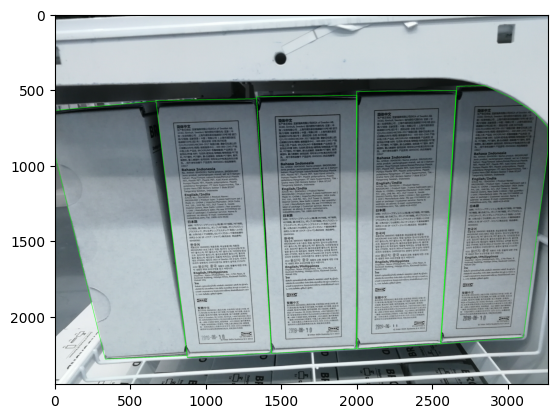

In [ ]:
plt.imshow(image);